In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='training',
                                               target_size=(100, 100))

valid_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='validation',
                                               target_size=(100, 100))

test_data = train_datagen.flow_from_directory('data/test',
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=256,
                                              target_size=(100, 100))

Found 3161 images belonging to 10 classes.
Found 349 images belonging to 10 classes.
Found 1170 images belonging to 10 classes.


In [12]:
train_data.class_indices

{'Apple 5': 0,
 'Apricot 1': 1,
 'Avocado 1': 2,
 'Banana 3': 3,
 'Beans 1': 4,
 'Blackberrie 1': 5,
 'Cabbage white 1': 6,
 'Cactus fruit 1': 7,
 'Carrot 1': 8,
 'Corn 1': 9}

In [13]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,888 (148.00 KB)

 Trainable params: 37,888 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=valid_data, epochs=8)

Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2224 - loss: 2.4170 - val_accuracy: 0.4928 - val_loss: 1.6934
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5195 - loss: 1.3303 - val_accuracy: 0.7278 - val_loss: 0.8045
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7169 - loss: 0.7579 - val_accuracy: 0.7650 - val_loss: 0.5472
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8241 - loss: 0.4666 - val_accuracy: 0.9398 - val_loss: 0.2616
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8630 - loss: 0.2809 - val_accuracy: 0.8940 - val_loss: 0.2047
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8890 - loss: 0.1778 - val_accuracy: 0.9828 - val_loss: 0.0857
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9007 - loss: 0.1133 - val_accuracy: 0.9943 - val_loss: 0.0319
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9007 - loss: 0.0661 - val_accuracy: 0.9685 - val_loss: 0.0161


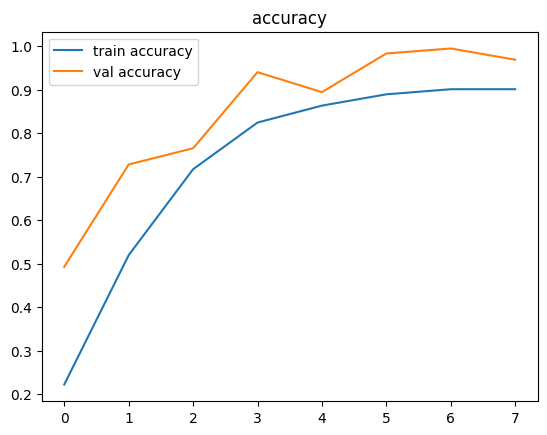

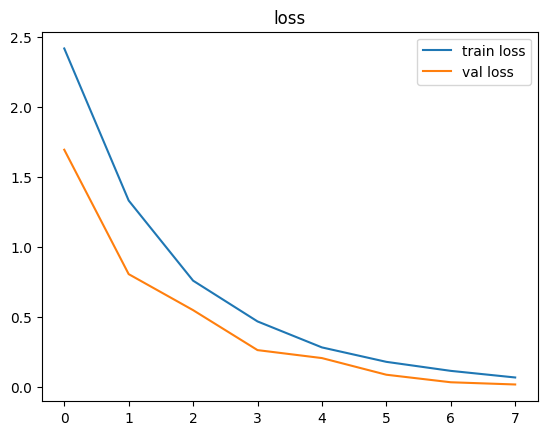

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_data)
print(accuracy * 100)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 722ms/step - accuracy: 0.8812 - loss: 0.0307
88.11965584754944


In [18]:
model.save('models/simple-cnn-84.h5')